In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [8]:
# Parameters
np.random.seed(42)
num_samples = 200


In [9]:
# Generate data
X = np.linspace(-10, 10, num_samples)
# Polynomial function: y = 1 + 2x + 3x^2 + noise
y = 1 + 2*X + 3*X**2 + np.random.normal(0, 10, num_samples)

In [10]:
# Create a DataFrame
data = pd.DataFrame({'X': X, 'y': y})

In [11]:
# Save to CSV
data.to_csv('polynomial_regression_dataset.csv', index=False)

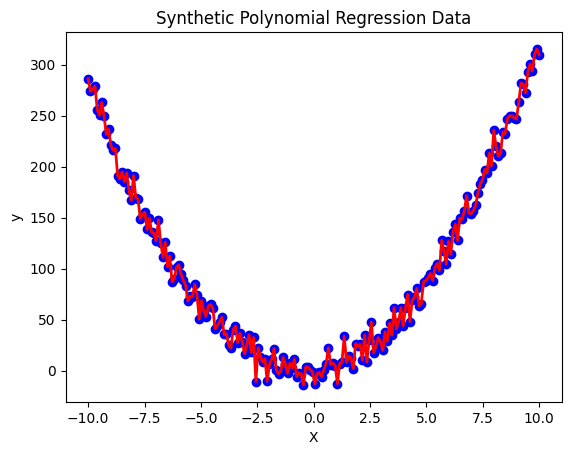

In [20]:
# Plot the data
plt.scatter(X, y, color='blue')
plt.plot(X, y, color='red', linewidth=2, label='Best fit line')
plt.title('Synthetic Polynomial Regression Data')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [21]:
# Define features (X) and target (y)
X = data[['X']]
y = data['y']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [23]:

# Fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [24]:
# Make predictions
y_pred = model.predict(X_test)

In [25]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [26]:
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 74.31375319720615
Mean Squared Error: 6982.940258404992
Root Mean Squared Error: 83.56398900486377


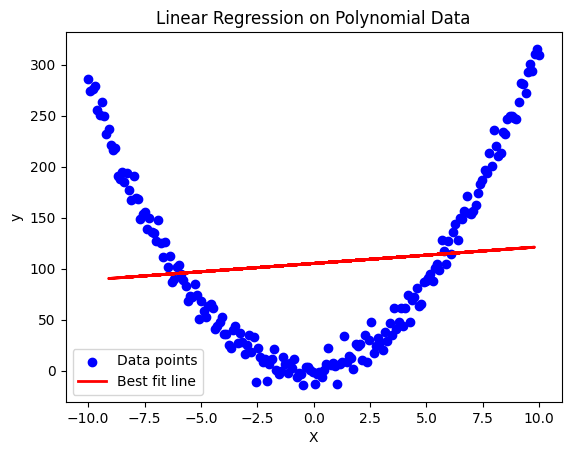

In [27]:
# Plot the data points and the best fit line
plt.scatter(X, y, color='blue', label='Data points')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Best fit line')
plt.title('Linear Regression on Polynomial Data')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:

# Transform the features to include polynomial terms (degree 2 for quadratic)
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2,include_bias=True)
X_poly_train = poly.fit_transform(X_train)
X_poly_test = poly.transform(X_test)

In [33]:
X_poly_train


array([[ 1.00000000e+00,  1.00000000e+00,  1.45728643e+00, ...,
         2.12368375e+00,  3.09481551e+00,  4.51003265e+00],
       [ 1.00000000e+00,  1.00000000e+00,  7.38693467e+00, ...,
         5.45668039e+01,  4.03081416e+02,  2.97753608e+03],
       [ 1.00000000e+00,  1.00000000e+00, -9.49748744e+00, ...,
         9.02022676e+01, -8.56694904e+02,  8.13644908e+03],
       ...,
       [ 1.00000000e+00,  1.00000000e+00, -7.53768844e-01, ...,
         5.68167471e-01, -4.28266938e-01,  3.22814275e-01],
       [ 1.00000000e+00,  1.00000000e+00,  7.98994975e+00, ...,
         6.38392970e+01,  5.10072775e+02,  4.07545584e+03],
       [ 1.00000000e+00,  1.00000000e+00,  2.51256281e-01, ...,
         6.31297189e-02,  1.58617384e-02,  3.98536141e-03]])

In [35]:
y_test


95     -13.926051
15     194.757948
30     127.380601
158    104.547686
128     32.338172
115     14.411171
69      16.606831
170    156.885543
174    186.926929
45      72.852087
66      27.552947
182    213.118781
165    148.297931
78      11.603222
186    249.848434
177    213.116210
56      41.203567
152     88.273135
82      21.541421
68      28.352124
124     29.982129
16     185.362737
148     87.246662
93      -2.302883
65      43.694998
60      35.547668
84      -2.920395
67      36.509433
125     47.734232
132     28.916394
9      236.417772
18     176.813070
55      61.374138
75      22.483337
150     90.934034
104      0.905286
135     61.823452
137     47.929634
164    149.663584
76      13.881278
79     -10.261765
197    310.196149
38      89.967073
24     153.110780
122     34.891078
195    300.413387
29     134.522041
19     167.062312
143     68.929518
86      12.963041
Name: y, dtype: float64